# WANTED SLOT MACHINE SIMULATION

Autor: *Iván Arcos Gabaldón*

### Premios de los símbolos, probabilidades y líneas 

In [1846]:
import numpy as np 
import itertools
import random
import collections

dic_premios = {"10:3": 0.1, "J:3": 0.1, "Q:3": 0.1, "K:3": 0.1, "A:3": 0.1, "Cabra:3": 0.5,
               "Sombrero:3": 0.5, "Bolsa:3": 1, "Botella:3": 1,"Sacarino:3":2,
               "10:4": 0.5, "J:4": 0.5, "Q:4": 0.5, "K:4": 0.5, "A:4": 0.5, "Cabra:4": 2.5,
               "Sombrero:4": 2.5, "Bolsa:4": 5, "Botella:4": 5, "Sacarino:4":10, 
               "10:5": 1, "J:5": 1, "Q:5": 1, "K:5": 1, "A:5": 1, "Cabra:5": 5,
               "Sombrero:5": 5, "Bolsa:5": 10, "Botella:5": 10, "Sacarino:5":20,
               "Wild": 20, "Wild:3":2,"Wild:4":10,"Wild:5":20,
               "WildExp":20, "WildExp:3":2, "WildExp:4":10, "WildExp:5":20,
               "Tren:3":0, "Tren:4":0, "Tren:5":0,
               "Duel:3":0, "Duel:4":0, "Duel:5":0,
               "Dead:3":0, "Dead:4":0, "Dead:5":0}  


dic_probs_bg = {"10": 0.14, "J": 0.14, "Q": 0.14, "K": 0.14, "A": 0.14,
             "Cabra": 0.08, "Sombrero": 0.08,
             "Bolsa": 0.041, "Botella": 0.041,
             "Sacarino": 0.02,
             "Wild": 0.01,
             "WildExp": 0.004,
             "Tren": 0.009, "Duel": 0.008, "Dead": 0.007}

mult2 = {2:0.19, 3:0.17, 4:0.15, 5:0.13,
         10:0.11, 15:0.09, 20:0.07, 25:0.05,
         50:0.025, 75:0.01, 100:0.005}

simbolos = dic_probs.keys()

combs_ganadoras = [[(0,0),(0,1),(0,2),(0,3),(0,4)],
                   [(1,0),(1,1),(1,2),(1,3),(1,4)],
                   [(2,0),(2,1),(2,2),(2,3),(2,4)],
                   [(3,0),(3,1),(3,2),(3,3),(3,4)],
                   [(4,0),(4,1),(4,2),(4,3),(4,4)],
                   [(0,0),(1,1),(2,2),(3,3),(4,4)],
                   [(4,0),(3,1),(2,2),(1,3),(0,4)],
                   [(0,0),(1,1),(0,2),(1,3),(0,4)],
                   [(1,0),(0,1),(1,2),(0,3),(1,4)],
                   [(1,0),(2,1),(1,2),(2,3),(1,4)],
                   [(2,0),(1,1),(2,2),(1,3),(2,4)],
                   [(2,0),(3,1),(2,2),(3,3),(2,4)],
                   [(3,0),(2,1),(3,2),(2,3),(3,4)],
                   [(3,0),(4,1),(3,2),(4,3),(3,4)],
                   [(4,0),(3,1),(4,2),(3,3),(4,4)]]

# Una spin vacía se define de la siguiente manera
slot = np.zeros((5,5), 'U10')
slot 

array([['', '', '', '', ''],
       ['', '', '', '', ''],
       ['', '', '', '', ''],
       ['', '', '', '', ''],
       ['', '', '', '', '']], dtype='<U10')

### Función para generar n spins a un determinado bet

In [1870]:
def generar_spins(n,bet=1, dic_probs = dic_probs_bg, duel = False):
    mult2 = {2:0.19, 3:0.17, 4:0.15, 5:0.13,
         10:0.11, 15:0.09, 20:0.07, 25:0.05,
         50:0.025, 75:0.01, 100:0.005}
    jugadas = []
    premios = []
    f_e = []
    bonos_r = []
    
    if duel == False:
        d2 = {"10": 0.14, "J": 0.14, "Q": 0.14, "K": 0.14, "A": 0.14,
              "Cabra": 0.081, "Sombrero": 0.081,
              "Bolsa": 0.042, "Botella": 0.042,
              "Sacarino": 0.02,
              "Wild": 0.01,
              "Tren": 0.009, "Duel": 0.008, "Dead": 0.007}
    else:
        
        d2 = {"10": 0.142, "J": 0.142, "Q": 0.142, "K": 0.142, "A": 0.142,
              "Cabra": 0.0835, "Sombrero": 0.0835,
              "Bolsa": 0.0435, "Botella": 0.0435,
              "Sacarino": 0.026,
              "Wild": 0.01} 
          
    for spin in range(n):
        flags_expansivos = [0,0,0,0,0]
        bonos = {'Tren': [False, None], 'Duel': [False, None], 'Dead': [False, None]}
        slot = np.zeros((5,5), 'U10')
        for j in range(5):
            dic_probs2 = dic_probs
            for i in range(5):
                probrandom = random.uniform(0,1)
                probcum = 0
                kv = list(zip(dic_probs2.values(), dic_probs2.keys()))
                for prob,simb in kv:
                    if probrandom <= (prob+probcum):
                        s = simb
                        slot[i,j] = s
                        break
                    else:
                        probcum += prob
                        
                if simb == "WildExp":
                    #print(f"WildExp --> {spin}")
                    probcum2 = 0
                    probrandom2 = random.uniform(0,1)
                    #slot[:,j] = "Wild"
                    kvmult = list(zip(mult2.values(), mult2.keys()))
                    for pmult,s in sorted(kvmult):
                        if probrandom2 <= (probcum2 + pmult):
                            mult = s
                            break
                        else:
                            probcum2 += pmult 
                    flags_expansivos[j] = mult
                    dic_probs2 = d2
                    #break       
        jugadas.append(slot)  
        premios.append(buscar_combinacion(slot, flags_expansivos))
        f_e.append(flags_expansivos)
        
        el, c = np.unique(slot, return_counts=True) 
        d = dict(zip(el, c))

        if "Tren" in d and d["Tren"] >= 3:
            #print(f"Bono Tren --> {spin}")
            bonos["Tren"][0] = True
            bonos["Tren"][1] = jugar_tren(bet)
            
        if "Duel" in d and d["Duel"] >= 3:
            #print(f"Bono Duel --> {spin}")
            bonos["Duel"][0] = True
            bonos["Duel"][1] = jugar_duel(bet)
            
        if "Dead" in d and d["Dead"] >= 3:
            #print(f"Bono Dead --> {spin}")
            bonos["Dead"][0] = True
            bonos["Dead"][1] = jugar_dead(bet)
        
        bonos_r.append(bonos)
    
    return jugadas, premios, f_e, bonos_r

#### Generar una spin de manera gráfica

In [2602]:
import cv2
def generar_grafico_spin(spin):
    plt.figure(figsize = (4,4))
    cont = 0
    for i in range(0,5):
        for j in range(0,5):
            cont += 1
            plt.subplot(5,5,cont)
            img = cv2.cvtColor(cv2.resize(cv2.imread(f"{spin[i][j]}.jpg"), (256,256)), cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            plt.axis('off')
    plt.show()

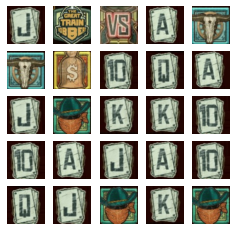

([array([['J', 'Tren', 'WildExp', 'A', 'Cabra'],
         ['Cabra', 'Bolsa', '10', 'Q', 'A'],
         ['J', 'Sombrero', 'K', 'K', '10'],
         ['10', 'A', 'J', 'A', '10'],
         ['Q', 'J', 'Sombrero', 'K', 'Sombrero']], dtype='<U10')],
 [({}, 0)],
 [[0, 0, 25, 0, 0]],
 [{'Tren': [False, None], 'Duel': [False, None], 'Dead': [False, None]}])

In [2674]:
a,b,c,d = generar_spins(1)
generar_grafico_spin(a[0])
a,b,c,d

In [2709]:
a,b,c,d = generar_spins(10)
a,b,c,d 

([array([['WildExp', 'K', 'Cabra', 'Dead', 'K'],
         ['Q', 'Botella', '10', 'K', 'K'],
         ['Sombrero', 'K', 'J', 'J', 'Sombrero'],
         ['J', 'J', 'A', 'Sombrero', 'Q'],
         ['Q', 'Sombrero', 'Cabra', 'Botella', 'K']], dtype='<U10'),
  array([['K', 'Cabra', 'Botella', 'J', '10'],
         ['J', 'A', 'A', 'J', 'A'],
         ['J', '10', 'Q', 'Cabra', '10'],
         ['K', 'K', 'J', 'Q', 'Sombrero'],
         ['J', '10', 'Botella', 'A', 'Q']], dtype='<U10'),
  array([['Sombrero', 'Q', 'Cabra', 'J', 'Q'],
         ['Sombrero', 'Q', 'J', 'K', '10'],
         ['Q', 'A', 'J', 'A', '10'],
         ['A', 'Q', 'K', 'Cabra', 'Sacarino'],
         ['Sacarino', '10', 'A', 'Cabra', 'Duel']], dtype='<U10'),
  array([['Q', 'Cabra', 'Cabra', 'J', 'K'],
         ['J', 'A', 'K', 'Botella', 'K'],
         ['Bolsa', 'A', 'A', 'J', 'J'],
         ['Botella', 'J', '10', 'J', 'A'],
         ['Q', 'J', 'Q', 'Bolsa', 'A']], dtype='<U10'),
  array([['Bolsa', 'K', 'Botella', 'Botella', 'Sombr

#### Bono del tren

In [2676]:
def jugar_tren(bet=1):
    jugadas = []
    premios = []
    dinero_total = 0
    dic_probs = {"10": 0.13, "J": 0.13, "Q": 0.13, "K": 0.13, "A": 0.13,
             "Cabra": 0.085, "Sombrero": 0.085,
             "Bolsa": 0.05, "Botella": 0.05,
             "Sacarino": 0.02,
             "Wild": 0.06}
    
    slot = np.zeros((5,5), 'U10')
    for spin in range(10):
        for j in range(5):
            for i in range(5):
                if slot[j,i] == "Wild":
                    pass
                else:
                    probrandom = random.uniform(0,1)
                    probcum = 0
                    kv = list(zip(dic_probs.values(), dic_probs.keys()))
                    for prob,simb in kv:
                        if probrandom <= (prob+probcum):
                            s = simb
                            slot[j,i] = s
                            break
                        else:
                            probcum += prob
        jugadas.append(slot.copy())  
        p,d = buscar_combinacion(slot, bet = bet)
        premios.append((p,d))
        dinero_total += d
    return jugadas, premios, dinero_total

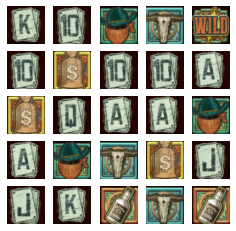

({'10:[(1, 0), (0, 1), (1, 2)]': 1.0}, 1.0)


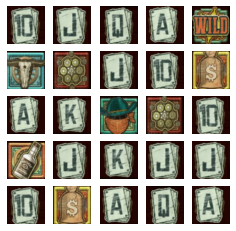

({}, 0)


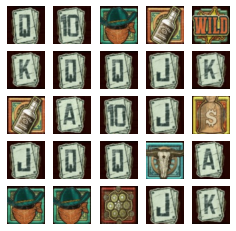

({}, 0)


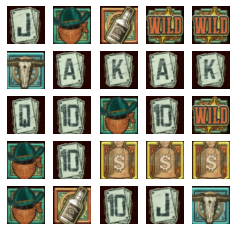

({}, 0)


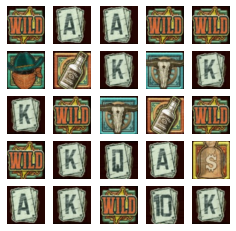

({'A:[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]': 10, 'Q:[(3, 0), (2, 1), (3, 2)]': 1.0}, 11.0)


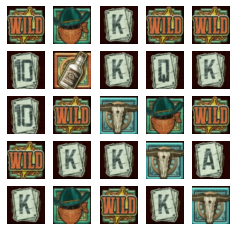

({'K:[(3, 0), (3, 1), (3, 2)]': 1.0, 'K:[(3, 0), (2, 1), (3, 2)]': 1.0, 'K:[(4, 0), (3, 1), (4, 2)]': 1.0}, 3.0)


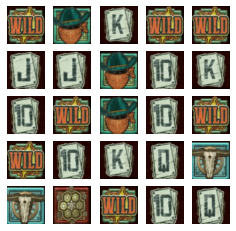

({'K:[(3, 0), (2, 1), (3, 2)]': 1.0}, 1.0)


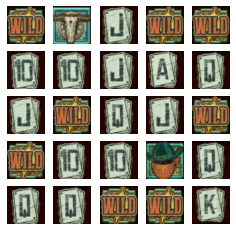

({'10:[(3, 0), (3, 1), (3, 2)]': 1.0, 'Q:[(4, 0), (4, 1), (4, 2), (4, 3)]': 5.0, '10:[(3, 0), (2, 1), (3, 2)]': 1.0}, 7.0)


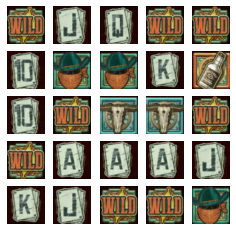

({'A:[(3, 0), (3, 1), (3, 2), (3, 3)]': 5.0, 'A:[(3, 0), (2, 1), (3, 2)]': 1.0}, 6.0)


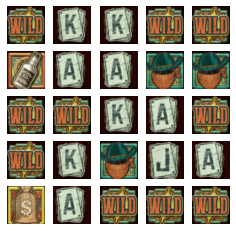

({'K:[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]': 10, 'K:[(2, 0), (2, 1), (2, 2)]': 1.0, 'K:[(2, 0), (3, 1), (2, 2)]': 1.0, 'Sombrero:[(3, 0), (2, 1), (3, 2)]': 5.0}, 17.0)


Total pagado --> 46.0


In [2677]:
a,b,c = jugar_tren(10)
for spin,comb in zip(a,b):
    generar_grafico_spin(spin)
    print(comb)
print('\n')
print(f"Total pagado --> {c}")

#### Bono del Duel

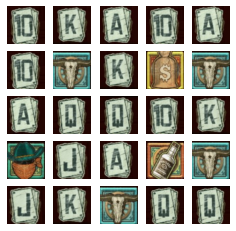

({}, 0) [0, 0, 0, 0, 0]


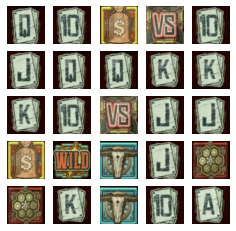

({'Bolsa:[(3, 0), (3, 1), (3, 2), (3, 3)]': 30, 'Q:[(0, 0), (1, 1), (2, 2), (3, 3)]': 3.0, 'Sacarino:[(4, 0), (3, 1), (2, 2), (1, 3)]': 60, 'Q:[(0, 0), (1, 1), (0, 2), (1, 3)]': 3.0, 'K:[(2, 0), (3, 1), (2, 2), (3, 3)]': 3.0, 'Sacarino:[(4, 0), (3, 1), (4, 2), (3, 3)]': 60}, 159.0) [0, 0, 3, 3, 0]


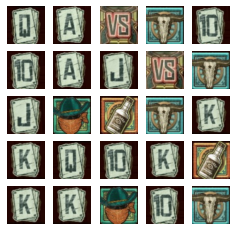

({'K:[(4, 0), (4, 1), (4, 2), (4, 3)]': 3.5, 'K:[(3, 0), (4, 1), (3, 2), (4, 3)]': 3.5}, 7.0) [0, 0, 4, 3, 0]


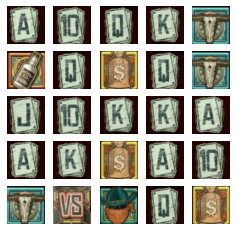

({}, 0) [0, 2, 0, 0, 0]


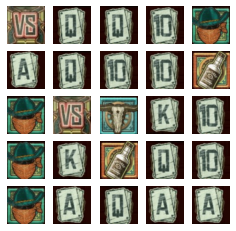

({'Q:[(0, 0), (0, 1), (0, 2)]': 0.5, '10:[(1, 0), (1, 1), (1, 2), (1, 3)]': 2.5, 'Cabra:[(2, 0), (2, 1), (2, 2)]': 2.5, 'Botella:[(3, 0), (3, 1), (3, 2)]': 5, 'Q:[(4, 0), (4, 1), (4, 2)]': 0.5, 'Cabra:[(0, 0), (1, 1), (2, 2)]': 2.5, 'Cabra:[(4, 0), (3, 1), (2, 2)]': 2.5, 'Q:[(0, 0), (1, 1), (0, 2)]': 0.5, '10:[(1, 0), (0, 1), (1, 2), (0, 3)]': 2.5, '10:[(1, 0), (2, 1), (1, 2)]': 0.5, 'Cabra:[(2, 0), (1, 1), (2, 2)]': 2.5, 'Cabra:[(2, 0), (3, 1), (2, 2)]': 2.5, 'Botella:[(3, 0), (2, 1), (3, 2)]': 5, 'Botella:[(3, 0), (4, 1), (3, 2)]': 5, 'Q:[(4, 0), (3, 1), (4, 2), (3, 3)]': 2.5}, 37.0) [2, 3, 0, 0, 0]


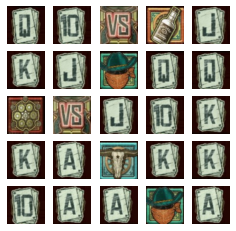

({'Q:[(0, 0), (0, 1), (0, 2)]': 1.4000000000000001, 'K:[(1, 0), (1, 1), (1, 2)]': 1.4000000000000001, 'Sacarino:[(2, 0), (2, 1), (2, 2)]': 28, 'K:[(3, 0), (3, 1), (3, 2), (3, 3), (3, 4)]': 14, '10:[(4, 0), (4, 1), (4, 2)]': 1.4000000000000001, 'Q:[(0, 0), (1, 1), (2, 2)]': 1.4000000000000001, '10:[(4, 0), (3, 1), (2, 2)]': 1.4000000000000001, 'Q:[(0, 0), (1, 1), (0, 2), (1, 3)]': 7.0, 'K:[(1, 0), (0, 1), (1, 2)]': 1.4000000000000001, 'K:[(1, 0), (2, 1), (1, 2)]': 1.4000000000000001, 'Sacarino:[(2, 0), (1, 1), (2, 2)]': 28, 'Sacarino:[(2, 0), (3, 1), (2, 2)]': 28, 'K:[(3, 0), (2, 1), (3, 2)]': 1.4000000000000001, 'K:[(3, 0), (4, 1), (3, 2)]': 1.4000000000000001, '10:[(4, 0), (3, 1), (4, 2)]': 1.4000000000000001}, 119.0) [0, 4, 10, 0, 0]


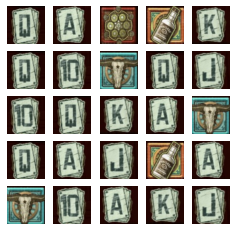

({}, 0) [0, 0, 0, 0, 0]


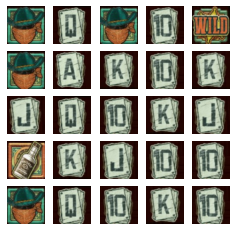

({}, 0) [0, 0, 0, 0, 0]


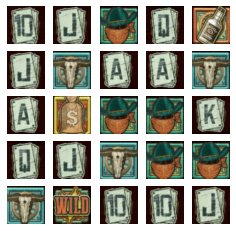

({}, 0) [0, 0, 0, 0, 0]


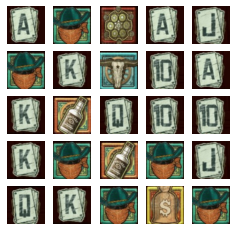

({}, 0) [0, 0, 0, 0, 0]


Total pagado --> 322.0


In [2446]:
def jugar_duel(bet=1):
    jugadas = []
    premios = []
    dinero_total = 0
    dic_probs = {"10": 0.14, "J": 0.14, "Q": 0.14, "K": 0.14, "A": 0.14,
                 "Cabra": 0.082, "Sombrero": 0.082,
                 "Bolsa": 0.041, "Botella": 0.041,
                 "Sacarino": 0.024,
                 "Wild": 0.01,
                 "WildExp": 0.02}
    
    jugadas, premios, f_e, bonos_r = generar_spins(10,bet=bet,dic_probs = dic_probs, duel = True)
     
    return jugadas, premios, sum(elem[1] for elem in premios), f_e

a,b,c,d = jugar_duel(10)
cont=0
for spin,comb in zip(a,b):
    generar_grafico_spin(spin)
    print(comb, d[cont])
    cont+= 1
print('\n')
print(f"Total pagado --> {c}")

#### Bono del dead

<AxesSubplot:ylabel='Density'>

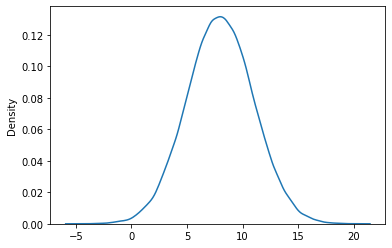

In [2275]:
import seaborn as sns
sns.kdeplot(np.random.normal(8,3,100000))

In [2503]:
np.random.normal(8,3)

5.055119660817395

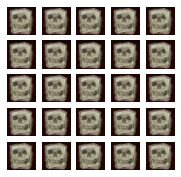

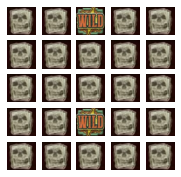

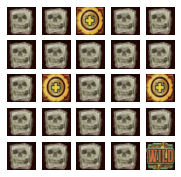

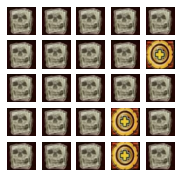

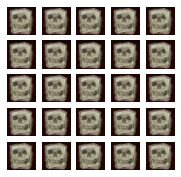

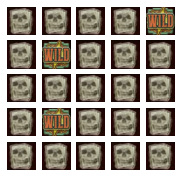

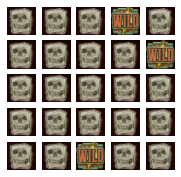

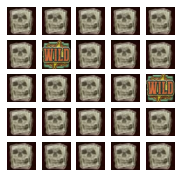

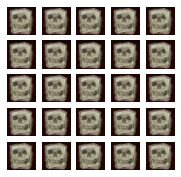

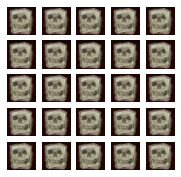

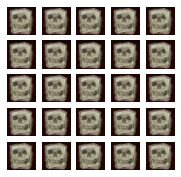

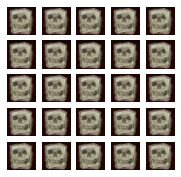

{'Wilds': [11, [[None], [(3, 2), (0, 2)], [(4, 4)], [None], [None], [(3, 1), (1, 1), (0, 4)], [(0, 3), (4, 2), (1, 4)], [(2, 4), (1, 1)], [None], [None], [None], [None]]], 'Multis': [6, [[None], [None], [(2, 1), (0, 2), (2, 4)], [(1, 4), (3, 3), (4, 3)], [None], [None], [None], [None], [None], [None], [None], [None]]]}


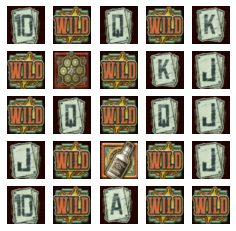

({'Sacarino:[(1, 0), (1, 1), (1, 2)]': 120, 'Q:[(2, 0), (2, 1), (2, 2), (2, 3)]': 30.0, '10:[(4, 0), (3, 1), (2, 2)]': 6.0, 'J:[(1, 0), (0, 1), (1, 2), (0, 3), (1, 4)]': 60, 'Q:[(1, 0), (2, 1), (1, 2), (2, 3)]': 30.0, 'Sacarino:[(2, 0), (1, 1), (2, 2)]': 120, 'J:[(2, 0), (3, 1), (2, 2), (3, 3), (2, 4)]': 60}, 426.0)


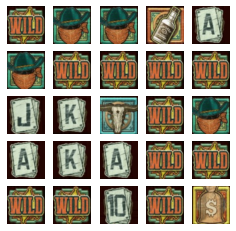

({'Sombrero:[(0, 0), (0, 1), (0, 2)]': 30.0, 'Sombrero:[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)]': 300, '10:[(4, 0), (4, 1), (4, 2), (4, 3)]': 30.0, 'Cabra:[(0, 0), (1, 1), (2, 2), (3, 3)]': 150.0, 'Sombrero:[(0, 0), (1, 1), (0, 2), (1, 3)]': 150.0, 'Sombrero:[(1, 0), (0, 1), (1, 2)]': 30.0, 'A:[(3, 0), (4, 1), (3, 2), (4, 3), (3, 4)]': 60}, 750.0)


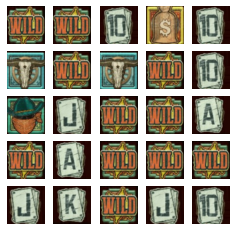

({'10:[(0, 0), (0, 1), (0, 2)]': 6.0, 'Cabra:[(1, 0), (1, 1), (1, 2), (1, 3)]': 150.0, 'A:[(3, 0), (3, 1), (3, 2), (3, 3), (3, 4)]': 60, '10:[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]': 60, '10:[(0, 0), (1, 1), (0, 2), (1, 3), (0, 4)]': 60, 'Cabra:[(1, 0), (0, 1), (1, 2)]': 30.0, 'Sombrero:[(2, 0), (1, 1), (2, 2), (1, 3)]': 150.0, 'J:[(3, 0), (2, 1), (3, 2), (2, 3), (3, 4)]': 60, 'K:[(3, 0), (4, 1), (3, 2)]': 6.0}, 582.0)


Total pagado --> 1758.0


In [2452]:
def jugar_dead(bet=1, graph = False):
    wilds, multi = np.random.normal(8,3), np.random.normal(8,3)
    if wilds <= 5:
        final_wilds = 5
    else:
        final_wilds = round(wilds)

    if multi <= 5:
        final_multi = 5
    else:
        final_multi = round(multi)

    distribucion = {'Wilds':[final_wilds,[]], 'Multis':[final_multi,[]]}
    
    posw = []
    posm = []
    cont1 = final_wilds
    cont2 = final_multi
    while cont1 != 0  or cont2 != 0:
        r = random.randint(1,3)
        for i in range(1,4):
            if i != r:
                pos = []
                for i in range(5):
                    for j in range(5):
                        pos.append((i,j))
                n = random.randint(1,3)
                
                if cont1 != 0:
                    m = random.randint(1,3)
                    n1 = min(m,cont1)
                else:
                    n1 = 0
                    
                if cont2 != 0:
                    m = random.randint(1,3)
                    n2 = min(m,cont2)
                else:
                    n2 = 0
                
                pa = []
                pb = []
                if n == 1 or (cont1 == 0 or cont2 == 0): 
                    for i in range(n1):
                        p1 = pos.pop(random.randrange(len(pos)))
                        pa.append(p1)
                        cont1 = cont1-1
                        
                    for i in range(n2):
                        p1 = pos.pop(random.randrange(len(pos)))
                        pb.append(p1)
                        cont2 = cont2-1
                    if pa == []:
                        distribucion['Wilds'][1].append([None])
                    else:
                        distribucion['Wilds'][1].append(pa)
                    if pb == []:
                        distribucion['Multis'][1].append([None])
                    else:
                        distribucion['Multis'][1].append(pb)
                
                elif n == 2:
                    for i in range(n1):
                        p1 = pos.pop(random.randrange(len(pos)))
                        pa.append(p1)
                        cont1 = cont1-1
                    distribucion['Wilds'][1].append(pa)
                    distribucion['Multis'][1].append([None])
                else:
                    for i in range(n2):
                        p1 = pos.pop(random.randrange(len(pos)))
                        pb.append(p1)
                        cont2 = cont2-1
                    distribucion['Multis'][1].append(pb)
                    distribucion['Wilds'][1].append([None])
                    
            else:
                distribucion['Wilds'][1].append([None])
                distribucion['Multis'][1].append([None])
    # Busteamos
    for i in range(3):
        distribucion['Multis'][1].append([None])
        distribucion['Wilds'][1].append([None])
    
    pos = []
    pos_numers = {}
    cont = 1
    for i in range(0,5):
        for j in range(0,5):
            pos.append((i,j))
            pos_numers[(i,j)] = cont
            cont += 1
    
    if graph:
        for wild,multi in zip(distribucion['Wilds'][1:][0], distribucion['Multis'][1:][0]):
            plt.figure(figsize=(3,3))
            if wild != [None] and wild != []:
                for elem in wild:
                    plt.subplot(5,5, pos_numers[(elem[0],elem[1])])
                    img = cv2.cvtColor(cv2.resize(cv2.imread(f"Wild.jpg"), (256,256)), cv2.COLOR_BGR2RGB)
                    plt.imshow(img)
                    plt.axis('off')
            if multi != [None] and multi != []:
                for elem in multi:
                    plt.subplot(5,5,pos_numers[(elem[0],elem[1])])
                    img = cv2.cvtColor(cv2.resize(cv2.imread(f"Multi.jpg"), (256,256)), cv2.COLOR_BGR2RGB)
                    plt.imshow(img)
                    plt.axis('off')
            for elem in list(set(pos).difference(set(wild+multi))):
                plt.subplot(5,5,pos_numers[(elem[0],elem[1])])
                img = cv2.cvtColor(cv2.resize(cv2.imread(f"Calavera.jpg"), (256,256)), cv2.COLOR_BGR2RGB)
                plt.imshow(img)
                plt.axis('off')
            plt.show()
       
    jugadas = []
    premios = []
    dinero_total = 0
    dic_probs = {"10": 0.15, "J": 0.135, "Q": 0.135, "K": 0.135, "A": 0.135,
             "Cabra": 0.095, "Sombrero": 0.095,
             "Bolsa": 0.05, "Botella": 0.05,
             "Sacarino": 0.02}

    for spin in range(3):
        slot = np.zeros((5,5), 'U10')
        wildspos = np.random.permutation(range(0,25))[0:final_wilds]
        posiciones = [pos[elem] for elem in wildspos]
        for j in range(5):
            for i in range(5):
                if (j,i) in posiciones:
                    slot[j,i] = "Wild"
                else:
                    probrandom = random.uniform(0,1)
                    probcum = 0
                    kv = list(zip(dic_probs.values(), dic_probs.keys()))
                    for prob,simb in kv:
                        if probrandom <= (prob+probcum):
                            s = simb
                            slot[j,i] = s
                            break
                        else:
                            probcum += prob
        jugadas.append(slot.copy())  
        p,d = buscar_combinacion(slot, bet = bet, dead = [True, final_multi])
        premios.append((p,d))
        dinero_total += d
        
    return jugadas, premios, dinero_total, distribucion
      
    
a,b,c,d = jugar_dead(bet=10, graph = True) 
print(d)
for spin,comb in zip(a,b):
    generar_grafico_spin(spin)
    print(comb)
    
print('\n')
print(f"Total pagado --> {c}")

#### Función para buscar combinaciones

In [2762]:
def buscar_combinacion(slot, flags_expansivos = [0,0,0,0,0], bet = 1, dead = [False, 0]):
    premios = {}
    for i,j,k,y,z in combs_ganadoras:
        elementos_linea = [slot[i[0]][i[1]], slot[j[0]][j[1]], slot[k[0]][k[1]], slot[y[0]][y[1]], slot[z[0]][z[1]]]
        if  'WildExp' in set(slot[:,0]):
            elementos_linea[0] = 'Wild'
        if 'WildExp' in set(slot[:,1]):
            elementos_linea[1] = 'Wild'
        if 'WildExp' in set(slot[:,2]):
            elementos_linea[2] = 'Wild'
        if 'WildExp' in set(slot[:,3]):
            elementos_linea[3] = 'Wild'
        if 'WildExp' in set(slot[:,4]):
            elementos_linea[4] = 'Wild'
        
        if len(set(elementos_linea)) == 1 or \
           (len(set(elementos_linea)) == 2 and 'Wild' in set(elementos_linea)):
            if len(set(elementos_linea)) == 1:
                elemento_comb = elementos_linea[0]
            else:
                elemento_comb = list(set(elementos_linea).difference(set(['Wild'])))[0]
            
            if sum(flags_expansivos) != 0:
                premios[f'{elemento_comb}:{[i,j,k,y,z]}'] = dic_premios[f"{elemento_comb}:5"] * bet * sum(flags_expansivos)
                
            elif dead[0]:
                premios[f'{elemento_comb}:{[i,j,k,y,z]}'] = dic_premios[f"{elemento_comb}:5"] * bet * dead[1]
            
            else:
                premios[f'{elemento_comb}:{[i,j,k,y,z]}'] = dic_premios[f"{elemento_comb}:5"] * bet  
                
        elif len(set(elementos_linea[0:4])) == 1 or \
           (len(set(elementos_linea[0:4])) == 2 and 'Wild' in set(elementos_linea[0:4])):
            
            if len(set(elementos_linea[0:4])) == 1:
                elemento_comb = elementos_linea[0]
            else:
                elemento_comb = list(set(elementos_linea[0:4]).difference(set(['Wild'])))[0]
            
            if sum(flags_expansivos) != 0:
                premios[f'{elemento_comb}:{[i,j,k,y]}'] = dic_premios[f"{elemento_comb}:4"] * bet * sum(flags_expansivos)
                
            elif dead[0]:
                premios[f'{elemento_comb}:{[i,j,k,y]}'] = dic_premios[f"{elemento_comb}:4"] * bet * dead[1]
                
            else:
                premios[f'{elemento_comb}:{[i,j,k,y]}'] = dic_premios[f"{elemento_comb}:4"] * bet
            
        elif len(set(elementos_linea[0:3])) == 1 or \
            (len(set(elementos_linea[0:3])) == 2 and 'Wild' in set(elementos_linea[0:3])):
            
            if len(set(elementos_linea[0:3])) == 1:
                elemento_comb = elementos_linea[0]
            else:
                elemento_comb = list(set(elementos_linea[0:3]).difference(set(['Wild'])))[0]
            
            if sum(flags_expansivos) != 0:
                premios[f'{elemento_comb}:{[i,j,k]}'] = dic_premios[f"{elemento_comb}:3"] * bet * sum(flags_expansivos[0:4])
                
            elif dead[0]:
                premios[f'{elemento_comb}:{[i,j,k]}'] = dic_premios[f"{elemento_comb}:3"] * bet * dead[1]
                
            else:
                premios[f'{elemento_comb}:{[i,j,k]}'] = dic_premios[f"{elemento_comb}:3"] * bet
    return premios, round(sum(premios.values()),2)
            
    
a,p,flags_expansivos,bonos = generar_spins(20)

In [2763]:
# 20 spins, una de ellas con bono de tren
a,p,flags_expansivos,bonos

([array([['J', 'Q', 'J', '10', '10'],
         ['Sombrero', 'Bolsa', 'Sombrero', 'Botella', 'A'],
         ['Cabra', 'Q', 'Cabra', 'Q', 'Q'],
         ['Q', 'A', 'A', '10', '10'],
         ['J', 'K', 'Q', 'A', 'Cabra']], dtype='<U10'),
  array([['A', 'J', 'Sombrero', 'A', 'K'],
         ['A', 'K', 'K', 'Sacarino', 'Sombrero'],
         ['K', 'Q', 'J', 'A', 'Q'],
         ['Q', '10', 'Duel', 'A', 'Cabra'],
         ['Sombrero', 'WildExp', '10', 'Q', 'Bolsa']], dtype='<U10'),
  array([['J', 'A', 'Q', 'Wild', 'Sombrero'],
         ['K', 'A', 'A', 'K', 'A'],
         ['K', 'Cabra', 'Cabra', '10', 'J'],
         ['K', '10', 'A', 'K', 'Sombrero'],
         ['J', 'Cabra', 'Q', '10', 'Cabra']], dtype='<U10'),
  array([['J', '10', 'A', 'K', 'K'],
         ['Sombrero', 'J', 'K', 'J', 'Q'],
         ['K', 'K', 'Bolsa', '10', 'J'],
         ['J', 'J', 'A', 'J', 'J'],
         ['Q', 'Bolsa', 'A', 'Bolsa', 'Cabra']], dtype='<U10'),
  array([['10', 'J', 'A', 'J', 'A'],
         ['J', 'Q', 'Bolsa', 'J

### Simulación 10 millones de spins

In [1936]:
dic_wilde = {'0':0,
             '1':0,
             '2':0,
             '3':0,
             '4':0,
             '5':0,
             'Pagos':[],
             'Tren':[],
             'Dead':[],
             'Duel':[[],{'0':0,
                         '1':0,
                         '2':0,
                         '3':0,
                         '4':0,
                         '5':0}]}
dinero = []
mejor,p2,d,f = None,None,0,None


for i in range(10000000):
    a,p,flags_expansivos,bono = generar_spins(1) 
    mas = 0
    for k,v in bono[0].items():
        if v[1] != None:
            if k == "Duel":
                dic_wilde[k][0].append(v[1][2])
                suma = 0
                for elem in bono[0]["Duel"][1][3]:
                    suma = 0
                    for elem2 in elem:
                        if elem2 == 0:
                            suma += 1
                    if suma == 0:
                        dic_wilde[k][1]['5'] += 1

                    elif suma == 1:
                        dic_wilde[k][1]['4'] += 1

                    elif suma == 2:
                        dic_wilde[k][1]['3'] += 1

                    elif suma == 3:
                        dic_wilde[k][1]['2'] += 1

                    elif suma == 4:
                        dic_wilde[k][1]['1'] += 1

                    else:
                        dic_wilde[k][1]['0'] += 1
                
            else:
                dic_wilde[k].append(v[1][2])
            #print(k,v[1][2])
            mas += v[1][2]
    dic_wilde['Pagos'].append(p[0][1]+mas)
    suma = 0
    for elem in flags_expansivos[0]:
        if elem == 0:
            suma += 1
    if suma == 0:
        dic_wilde['5'] += 1

    elif suma == 1:
        dic_wilde['4'] += 1

    elif suma == 2:
        dic_wilde['3'] += 1
    
    elif suma == 3:
        dic_wilde['2'] += 1
        
    elif suma == 4:
        dic_wilde['1'] += 1
        
    else:
        dic_wilde['0'] += 1

In [2678]:
#dic_wilde

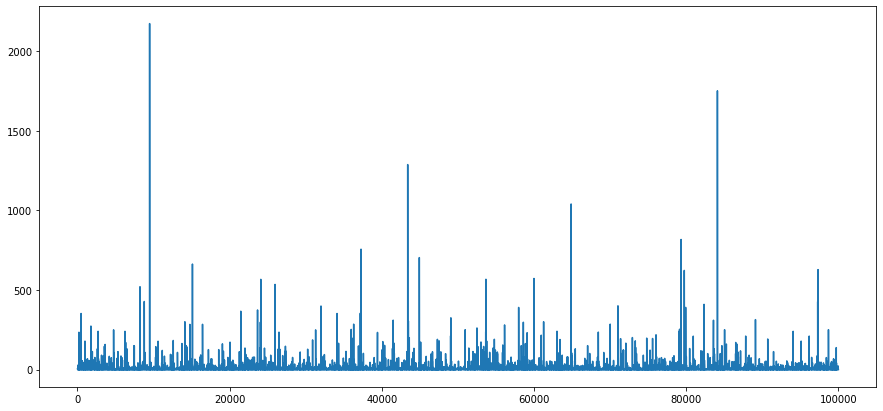

In [2655]:
plt.figure(figsize=(15,7))
plt.plot(dic_wilde['Pagos'][0:100000])
plt.show()

#### RTP

In [2600]:
sum(dic_wilde['Pagos']) / 10000000

0.9373858999787643

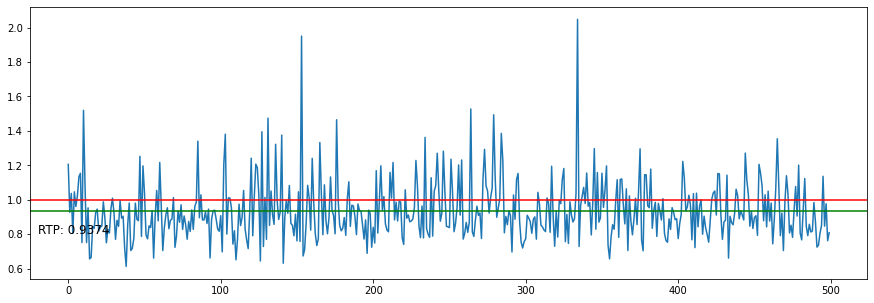

In [2297]:
intervalos_rtp = []
for i,j in zip(range(0,10000000,20000),range(10000,10000000,20000)):
    intervalos_rtp.append(sum(dic_wilde['Pagos'][i:j])/len(dic_wilde['Pagos'][i:j]))
plt.figure(figsize=(15,5))
plt.plot(intervalos_rtp)
plt.axhline(y = sum(dic_wilde['Pagos']) / 10000000, c = "green")
plt.text(-20,0.8,f"RTP: {round(sum(dic_wilde['Pagos']) / 10000000,4)}", fontsize = 12)
plt.axhline(y = 1, c = 'red')
plt.show()

### Simulando  500 000 bonos de cada tipo

In [ ]:
bonos_dic = {'Tren':[],
         'Dead':[],
         'Duel':[],
          'VS': {'0':0,
                 '1':0,
                 '2':0,
                 '3':0,
                 '4':0,
                 '5':0},
         'WILDS':[]}

for i in range(500000):
    print(i)
    a,b,c = jugar_tren(1)
    e,counts = np.unique(a[9], return_counts=True)
    d = dict(zip(e,counts))
    bonos_dic['WILDS'].append(d['Wild'])
    
    bonos_dic['Tren'].append(c)
    a,b,c,d = jugar_duel(1)
    bonos_dic['Duel'].append(c)
    for elem in d:
        suma = 0
        for elem2 in elem:
            if elem2 == 0:
                suma += 1
        if suma == 0:
            bonos_dic['VS']['5'] += 1

        elif suma == 1:
            bonos_dic['VS']['4'] += 1

        elif suma == 2:
            bonos_dic['VS']['3'] += 1

        elif suma == 3:
             bonos_dic['VS']['2'] += 1

        elif suma == 4:
             bonos_dic['VS']['1'] += 1

        else:
             bonos_dic['VS']['0'] += 1
            
    a,b,c,d = jugar_dead(1)
    bonos_dic['Dead'].append(c)

In [ ]:
#bonos_dic

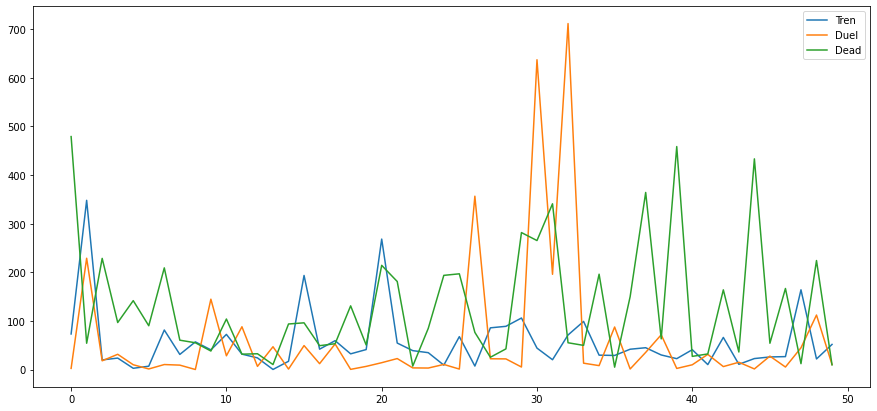

In [2657]:
plt.figure(figsize=(15,7))
plt.plot(bonos_dic['Tren'][0:50], label = "Tren")
plt.plot(bonos_dic['Duel'][0:50], label = "Duel")
plt.plot(bonos_dic['Dead'][0:50], label = "Dead")
plt.legend()

#### Precio de los bonos para cumplir con el RTP 0.9374

##### Tren

In [2531]:
round((sum(bonos_dic['Tren']) / len(bonos_dic['Tren'])) * (1+(1-0.9374)))

64

##### Duel

In [2530]:
round(sum(bonos_dic['Duel']) / len(bonos_dic['Dead']) * (1+(1-0.9374)))

92

##### Dead

In [2528]:
round(sum(bonos_dic['Dead']) / len(bonos_dic['Duel']) * (1+(1-0.9374)))

175

#### Distribuciones de probabilidad

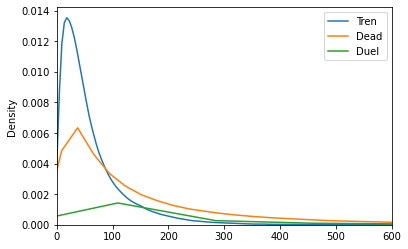

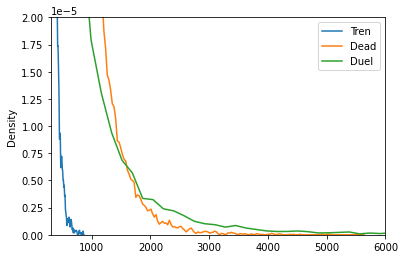

In [2504]:
ax = sns.kdeplot(bonos_dic['Tren'], label = "Tren")
ax = sns.kdeplot(bonos_dic['Dead'], label = "Dead")
ax = sns.kdeplot(bonos_dic['Duel'], label = "Duel")
plt.legend()
plt.xlim([0,600])
plt.show()


ax2 = sns.kdeplot(bonos_dic['Tren'], label = "Tren")
ax2 = sns.kdeplot(bonos_dic['Dead'], label = "Dead")
ax2 = sns.kdeplot(bonos_dic['Duel'], label = "Duel")
plt.legend()
plt.xlim([300,6000])
plt.ylim([0,0.00002])
plt.show()

#### Probabilidad de que el bono pague ×100

In [2511]:
import numpy as np
from scipy.integrate import simps
from numpy import trapz

line_tren = ax.lines[0] 
line_dead = ax.lines[1]
line_duel = ax.lines[2]

pos1 = np.where(line_tren.get_xdata() == next(x for x in line_tren.get_xdata() if x >= 100))
pos2 = np.where(line_dead.get_xdata() == next(x for x in line_dead.get_xdata() if x >= 100))
pos3 = np.where(line_duel.get_xdata() == next(x for x in line_duel.get_xdata() if x >= 100))

area_tren = simps(line_tren.get_ydata()[pos1[0][0]:],line_tren.get_xdata()[pos1[0][0]:])
area_dead = simps(line_dead.get_ydata()[pos2[0][0]:],line_dead.get_xdata()[pos2[0][0]:])
area_duel = simps(line_duel.get_ydata()[pos3[0][0]:],line_duel.get_xdata()[pos3[0][0]:])

print("Probability Tren = ", area_tren)
print("Probability Dead = ", area_dead)
print("Probability Duel = ", area_duel)

Probability Tren =  0.16608971476473716
Probability Dead =  0.3981165684050205
Probability Duel =  0.18850153642586065


#### Probabilidad de que el bono pague ×40 y ×160

In [2673]:
pos1 = np.where(line_tren.get_xdata() == next(x for x in line_tren.get_xdata() if x >= 40))
pos2 = np.where(line_dead.get_xdata() == next(x for x in line_dead.get_xdata() if x >= 40))
pos3 = np.where(line_duel.get_xdata() == next(x for x in line_duel.get_xdata() if x >= 40))

pos11 = np.where(line_tren.get_xdata() == next(x for x in line_tren.get_xdata() if x >= 160))
pos22 = np.where(line_dead.get_xdata() == next(x for x in line_dead.get_xdata() if x >= 160))
pos33 = np.where(line_duel.get_xdata() == next(x for x in line_duel.get_xdata() if x >= 160))

area_tren = simps(line_tren.get_ydata()[pos1[0][0]:pos11[0][0]+1],line_tren.get_xdata()[pos1[0][0]:pos11[0][0]+1])
area_dead = simps(line_dead.get_ydata()[pos2[0][0]:pos22[0][0]+1],line_dead.get_xdata()[pos2[0][0]:pos22[0][0]+1])
area_duel = simps(line_duel.get_ydata()[pos3[0][0]:pos33[0][0]+1],line_duel.get_xdata()[pos3[0][0]:pos33[0][0]+1])

print("Probability Tren = ", area_tren)
print("Probability Dead = ", area_dead)
print("Probability Duel = ", area_duel)

Probability Tren =  0.45896136539648225
Probability Dead =  0.3092746300526453
Probability Duel =  0.14925380253788967


#### Probabilidad de que el bono pague ×1000

In [2513]:
pos1 = np.where(line_tren.get_xdata() == next(x for x in line_tren.get_xdata() if x >= 800))
pos2 = np.where(line_dead.get_xdata() == next(x for x in line_dead.get_xdata() if x >= 1000))
pos3 = np.where(line_duel.get_xdata() == next(x for x in line_duel.get_xdata() if x >= 1000))

area_tren = simps(line_tren.get_ydata()[pos1[0][0]:],line_tren.get_xdata()[pos1[0][0]:])
area_dead = simps(line_dead.get_ydata()[pos2[0][0]:],line_dead.get_xdata()[pos2[0][0]:])
area_duel = simps(line_duel.get_ydata()[pos3[0][0]:],line_duel.get_xdata()[pos3[0][0]:])

print("Probability Tren = ", area_tren)
print("Probability Dead = ", area_dead)
print("Probability Duel = ", area_duel)

Probability Tren =  8.330315061752586e-06
Probability Dead =  0.012073323118792162
Probability Duel =  0.009123669711651732


#### Probabilidad de que el bono pague ×5000

In [2514]:
pos1 = np.where(line_tren.get_xdata() == next(x for x in line_tren.get_xdata() if x >= 800))
pos2 = np.where(line_dead.get_xdata() == next(x for x in line_dead.get_xdata() if x >= 5000))
pos3 = np.where(line_duel.get_xdata() == next(x for x in line_duel.get_xdata() if x >= 5000))

area_tren = simps(line_tren.get_ydata()[pos1[0][0]:],line_tren.get_xdata()[pos1[0][0]:])
area_dead = simps(line_dead.get_ydata()[pos2[0][0]:],line_dead.get_xdata()[pos2[0][0]:])
area_duel = simps(line_duel.get_ydata()[pos3[0][0]:],line_duel.get_xdata()[pos3[0][0]:])

print("Probability Tren = ", area_tren)
print("Probability Dead = ", area_dead)
print("Probability Duel = ", area_duel)

Probability Tren =  8.330315061752586e-06
Probability Dead =  6.98606729931977e-06
Probability Duel =  0.00045005194256726467


#### Probabilidad VERSUS

##### Base game

In [2589]:
dic_wilde_VS = {'0': 9045203,
                '1': 916812,
                '2': 37246,
                '3': 734,
                '4': 5,
                '5': 0}

pd.Series(dic_wilde_VS) / sum(dic_wilde_VS.values())

0    9.045203e-01
1    9.168120e-02
2    3.724600e-03
3    7.340000e-05
4    5.000000e-07
5    0.000000e+00
dtype: float64

##### Bono

In [2590]:
round(pd.Series(bonos_dic["VS"]) / sum(bonos_dic["VS"].values()),6)

0    0.603739
1    0.320378
2    0.068331
3    0.007163
4    0.000382
5    0.000008
dtype: float64

#### Probabilidad bonos

In [2644]:
print(f"Prob Tren --> {len(dic_wilde['Tren'])/10000000}")
print(f"Prob Duel --> {len(dic_wilde['Duel'][0])/10000000}")
print(f"Prob Dead --> {len(dic_wilde['Dead'])/10000000}")

Prob Tren --> 0.001457
Prob Duel --> 0.0010411
Prob Dead --> 0.0007053
